In [1]:
import pandas as pd 
import seaborn as sns 
from data_loader import get_dataset

In [2]:
loans_income = get_dataset(url="https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/loans_income.csv" , 
                           file_name="loans_income")
loans_income.head()

File already exists


,x
0,67000
1,52000
2,100000
3,78762
4,37041


In [3]:
index = pd.Index(range(1000))
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000).squeeze().values , 
    'type' : ['Data'] * 1000
} , index = index)

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).squeeze().values.mean() for _ in range(1000)] , 
    'type' : 'Mean of 5' 
} , index   = index )

sample_mean_50 = pd.DataFrame({
    'income' : [loans_income.sample(50).squeeze().values.mean() for _ in range(1000)] , 
    'type': 'Mean of 50'
}, index=index)



In [4]:
results = pd.concat([sample_data , sample_mean_05 , sample_mean_50])
results.shape

(3000, 2)

In [5]:
import matplotlib.pyplot as plt

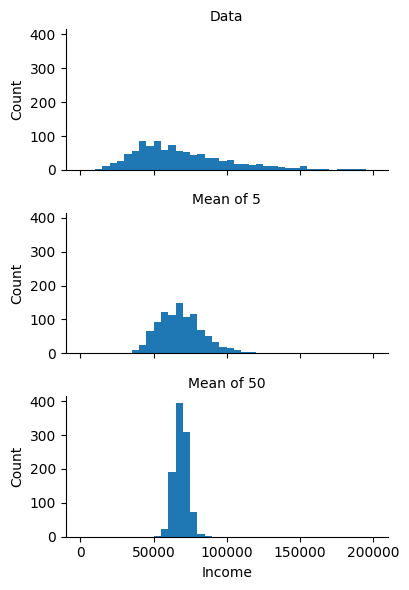

In [6]:
g = sns.FacetGrid(results , col = 'type' , col_wrap=1 , height=2 , aspect=2)
g.map(plt.hist , 'income' , range=[0 , 200000] , bins = 40)
g.set_axis_labels('Income' , 'Count')
g.set_titles('{col_name}')

In [7]:
#Bootstrap sample -> sample taken with replacement from an observed dataset 
#simply sample with replacement which creates an infinite population 
from sklearn.utils import resample

In [8]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.DataFrame(results)

print("Bootstrap Statistics:")
print(f"Original median: {loans_income['x'].median()}")
print(f"Bias : {results['x'].mean() - loans_income['x'].median()}")
print(f"Std error: {results['x'].std()}")

Bootstrap Statistics:
Original median: 62000.0
Bias : -70.53100000000268
Std error: 209.43629126562354


In [17]:
#confidence-interval for median 
#for confidence level 90%
from scipy.stats import trim_mean 
trimmed_data = trim_mean(results['x'] , ((100- 90)/2)/100)

In [18]:
trimmed_data.min() , trimmed_data.max()

(61966.64, 61966.64)

In [9]:
from scipy import stats 

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

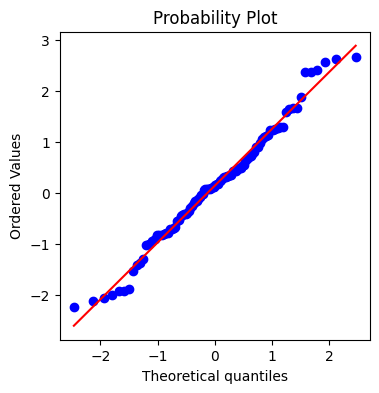

In [13]:
fig , ax  = plt.subplots(figsize=(4 , 4))
norm_sample = stats.norm.rvs(size = 100)
stats.probplot(norm_sample , plot = ax)


In [19]:
sp500_px = pd.read_csv("Data/sp500_data.csv.gz")
nflx = sp500_px.NFLX

In [22]:
import numpy as np 


((array([-3.33278964, -3.07756454, -2.93575124, ...,  2.93575124,
          3.07756454,  3.33278964]),
  array([-6.60529819, -6.09667121, -5.40220961, ...,  5.12547859,
          5.87072271,  6.03787   ])),
 (1.4823778663727092, 0.0015561067366313861, 0.9941828221936319))

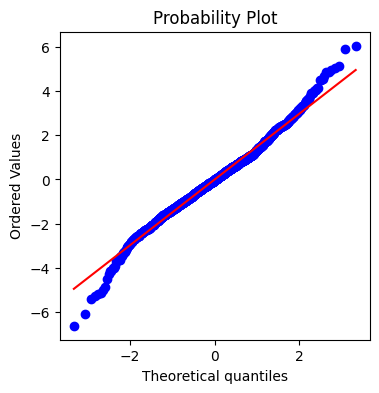

In [24]:
nflx = np.diff(np.log(nflx[nflx > 0]))
fig ,ax = plt.subplots(figsize = ( 4 , 4))
stats.probplot(nflx , plot= ax)

In [ ]:
print(f'Probability of getting 0 success in 200 trials with probability of 0.02 is \n {stats.binom.pmf(0 , n = 200 , p = 0.03)}')


Probability of getting 0 success in 200 trials with probability of 0.02 is 
 0.002261241009995781


In [32]:
stats.binom.cdf(100 , n = 200  , p = 0.02)

1.0

In [40]:
x = np.arange(0 , 201)
y = stats.binom.pmf(x , n = 200 , p = 0.02)

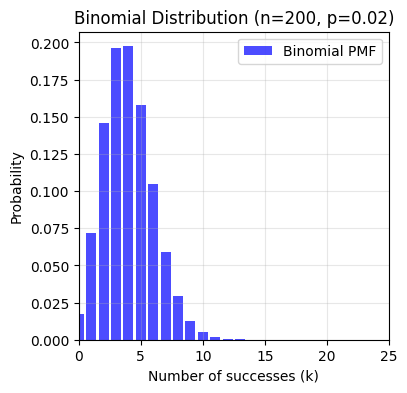

In [49]:

fig, ax = plt.subplots(figsize=(4, 4))
ax.bar(x, y, color='blue', alpha=0.7, label='Binomial PMF')  # Bar plot
ax.set_xlabel('Number of successes (k)')
ax.set_ylabel('Probability')
ax.set_title('Binomial Distribution (n=200, p=0.02)')
ax.grid(True, alpha=0.3)
ax.set_xlim( 0 , 25)
ax.legend()
plt.show()

(array([20., 20.,  0., 24.,  0., 20., 10.,  0.,  4.,  2.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

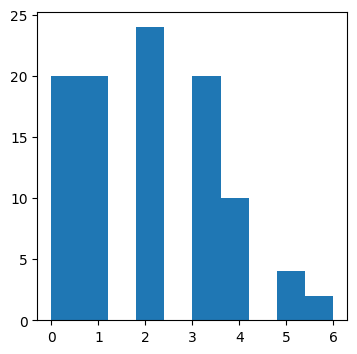

In [55]:
fig , ax = plt.subplots(figsize = ( 4, 4))
ax.hist(stats.poisson.rvs(2 , size = 100))

(array([0.931867  , 0.49844049, 0.21671326, 0.19504193, 0.13002795,
        0.06501398, 0.04334265, 0.02167133, 0.02167133, 0.04334265]),
 array([0.21156974, 0.67300898, 1.13444822, 1.59588746, 2.0573267 ,
        2.51876594, 2.98020518, 3.44164442, 3.90308366, 4.36452289,
        4.82596213]),
 <BarContainer object of 10 artists>)

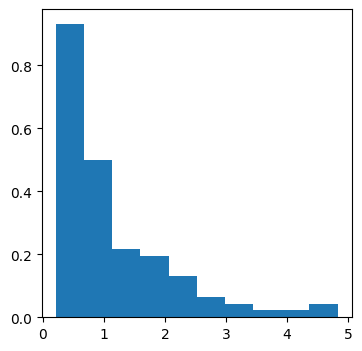

In [ ]:
fig , ax = plt.subplots(figsize = (4 , 4))
ax.hist(stats.expon.rvs(0.2 , size = 100) , density=True , bins=10)


(array([16., 25., 17., 10., 11.,  7.,  3., 10.,  0.,  1.]),
 array([  190.30777585,  1530.5791827 ,  2870.85058956,  4211.12199641,
         5551.39340327,  6891.66481012,  8231.93621698,  9572.20762383,
        10912.47903069, 12252.75043754, 13593.0218444 ]),
 <BarContainer object of 10 artists>)

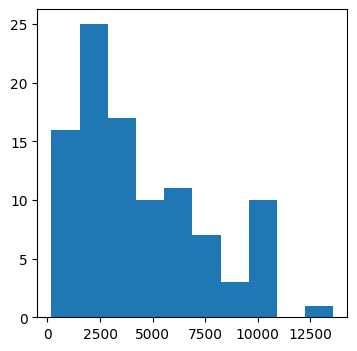

In [59]:
fig , ax = plt.subplots(figsize=(4 , 4))
ax.hist(stats.weibull_min.rvs(1.5 , scale = 5000 , size = 100))